# Titanic Survival Prediction

PROBLEM DESCRIPTION:-

    Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. 
    This is a classic beginner project with readily available data. 
    The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket
    class, fare, cabin, and whether or not they survived.

In [12]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
#loading dataset

df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
df.shape

(418, 12)

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [17]:
#Checking Null Values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
#handling null values

columns = ['Age', 'Fare']
for col in columns:
    df[col].fillna(df[col].median(), inplace = True)
    
df['Cabin'].fillna('Unknown', inplace=True)


df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
#checking duplicates

dup = df.duplicated().sum()
print("The number of duplicated values: ", dup)

The number of duplicated values:  0


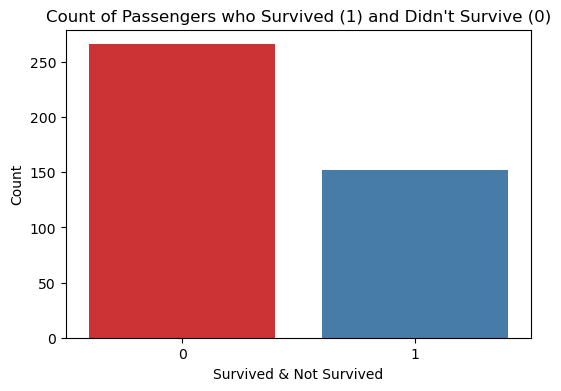

In [20]:
# Plotting the count of passengers who survived and didn't survive

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', palette="Set1")
plt.title("Count of Passengers who Survived (1) and Didn't Survive (0)")
plt.xlabel("Survived & Not Survived")
plt.ylabel("Count")
plt.show()

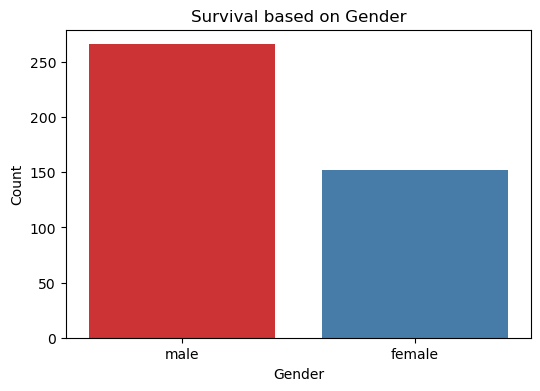

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', palette="Set1")
plt.title("Survival based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [22]:
pclass_counts = df.Pclass.value_counts()
fig_pclass_perc = px.pie(df, names= pclass_counts.index, values = pclass_counts.values, title=f'Pclass Distribution')
fig_pclass_perc.update_traces(textinfo='percent+label')
fig_pclass_perc.update_layout(legend_title_text='Categories:')
fig_pclass_perc.show()

In [23]:
fig_age = px.histogram(df, x='Age', nbins=30, histnorm='probability density')
fig_age.update_traces(marker=dict(color='#017161'), selector=dict(type='histogram'))
fig_age.update_layout(title='Distribution of Age', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Age', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_age.show()

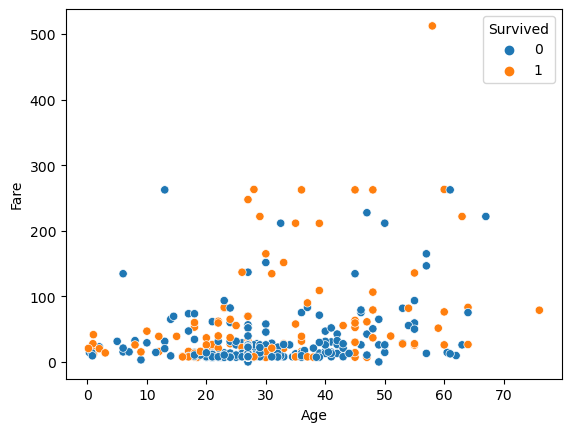

In [24]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

The graph shows that the passengers with high fares had more chance of survival

# Modelling 

In [25]:
# Let's drop bad features before modeling
df_update = df.drop(['PassengerId','Name', 'Ticket','Cabin'], axis=1)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [26]:
df_update['Sex'].replace({'male':1, 'female':0}, inplace=True)
df_update['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df['Sex']=labelencoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Unknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Unknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Unknown,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,Unknown,S


# Checking Accuracy

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
X = df[['Pclass','Sex']]
y = df['Survived']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state = 42)

In [31]:
log = LogisticRegression(random_state=42)
log.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [32]:
pred=print(log.predict(X_test))

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


In [33]:
print(y_test)

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, log.predict(X_test))
precision = precision_score(y_test, log.predict(X_test))
recall = recall_score(y_test, log.predict(X_test))
f1 = f1_score(y_test, log.predict(X_test))
conf_matrix = confusion_matrix(y_test, log.predict(X_test))

In [35]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]


In [36]:
import warnings
warnings.filterwarnings("ignore")
res = log.predict([[2,0]])

In [37]:
if(res==0):
    print("Sorry! Not Survived")
else:
    print("Survived")

Survived
